In [100]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [101]:
# Define utility function "calculate_elbow-method_data".

def calculate_elbow_method_data(df_input_data):
    '''
    Calculates Elbow Method data
    
    Args:
        df_input (Pandas DataFrame): Input DataFrame for which to calulate Elbow Method data.

    Returns:
        Pandas DataFrame with Elbow Method Data.
        The output DataFrame contains two columns, one with k-values from 1 through 10 and
        one for the corresponding inertia values.
    '''
    
    # Create an empty list to store the inertia values
    inertia = []

    # Create a list with the number of k-values to try
    # Use a range from 1 to 11
    k = list(range(1, 11))

    # Create a for loop to compute the inertia with each possible value of k
    for i in k:
        # 1. Create a KMeans model using the loop counter for the n_clusters
        model = KMeans(n_clusters=i, n_init='auto', random_state=1)
        # 2. Fit the model to the data using the scaled DataFrame
        model.fit(df_input_data)
        # 3. Append the model.inertia_ to the inertia list
        inertia.append(model.inertia_)

    # Create a dictionary with the data to plot the Elbow curve
    elbow_data = {'k': k, 'inertia': inertia}

    # Return a DataFrame with the data to plot the Elbow curve
    return pd.DataFrame(elbow_data)

In [102]:
# Define utility function "calculate_KMeans_clusters"

def calculate_KMeans_clusters(df_input_data, k_value):
    '''
    Uses the KMeans algorithm to segment input data into a number of clusters.
    Assumes value "auto" for "n_init" and value 0 for "random_state".

    Args:
        df_input_data (Pandas DataFrame): Containing the data to segment.
        k_value (int): The number of cluster to segment the data into.

    Returns:
        A list that assigns each row in df_input data to a segment.
    '''
    
    # Initialize the K-Means model using the given value of k
    model = KMeans(n_clusters=k_value, n_init='auto', random_state=0)

    # Fit the K-Means model
    model.fit(df_input_data)

    # Return a list assigning each row in the input data to a cluster
    return model.predict(df_input_data) 

In [130]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
cryptos_market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
cryptos_market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [104]:
# Generate summary statistics
cryptos_market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [105]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaled_cryptos = StandardScaler().fit_transform(cryptos_market_data_df)

scaled_cryptos[0:5]

array([[ 0.50852937,  0.49319307,  0.77220043,  0.23545963, -0.0674951 ,
        -0.35595348, -0.25163688],
       [ 0.18544589,  0.93444504,  0.55869212, -0.05434093, -0.27348273,
        -0.11575947, -0.19935211],
       [ 0.02177396, -0.70633685, -0.02168042, -0.06103015,  0.00800452,
        -0.55024692, -0.28206051],
       [-0.04076438, -0.81092807,  0.24945797, -0.05038797, -0.37316402,
        -0.45825882, -0.29554614],
       [ 1.19303608,  2.00095907,  1.76061001,  0.54584206, -0.29120287,
        -0.49984776, -0.27031695]])

In [106]:
# Create a DataFrame with the scaled data. Use the same column names as in the original DataFrame
df_scaled_cryptos = pd.DataFrame(scaled_cryptos, columns=['price_change_percentage_24h',
                                                          'price_change_percentage_7d',
                                                          'price_change_percentage_14d',
                                                          'price_change_percentage_30d',
                                                          'price_change_percentage_60d',
                                                          'price_change_percentage_200d',
                                                          'price_change_percentage_1y]'])

# Copy the crypto names from the original data
df_scaled_cryptos['coin_id'] = cryptos_market_data_df.index

# Set the 'coin_id' column as index
df_scaled_cryptos.set_index('coin_id', inplace=True)

# Display sample data
df_scaled_cryptos.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y]
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [107]:
# Create a DataFrame with the data to plot the Elbow curve
df_elbow = calculate_elbow_method_data(df_scaled_cryptos)

# Display the DataFrame
df_elbow.head()

c:\Users\cguenther\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\cguenther\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\cguenther\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\cguenther\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarn

,k,inertia
0,1,287.000000
1,2,212.123342
2,3,165.136752
3,4,79.022435
4,5,66.413051


<Axes: xlabel='k'>

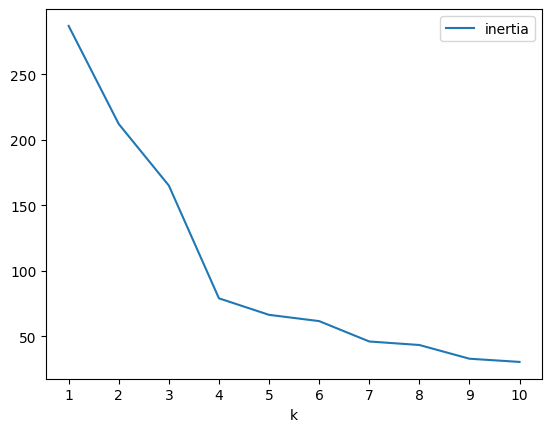

In [108]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.plot.line(x='k',
                   y='inertia',
                   xticks=df_elbow['k'])

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** The best value for `k` is `k=4`.

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [109]:
# Predict the clusters to group the cryptocurrencies using the scaled crypto currencies data
model_k4_predictions = calculate_KMeans_clusters(df_scaled_cryptos, 4)

# View the resulting array of cluster values.
model_k4_predictions

c:\Users\cguenther\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0])

In [110]:
# Create a copy of the DataFrame
df_scaled_cryptos_predictions = df_scaled_cryptos.copy()

In [111]:
# Add a new column to the DataFrame with the predicted clusters
df_scaled_cryptos_predictions['KMeans Cluster'] = model_k4_predictions

# Display sample data
df_scaled_cryptos_predictions.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y],KMeans Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


<Axes: title={'center': 'Crypto Currency Clusters w/o PCA Decomposition'}, xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

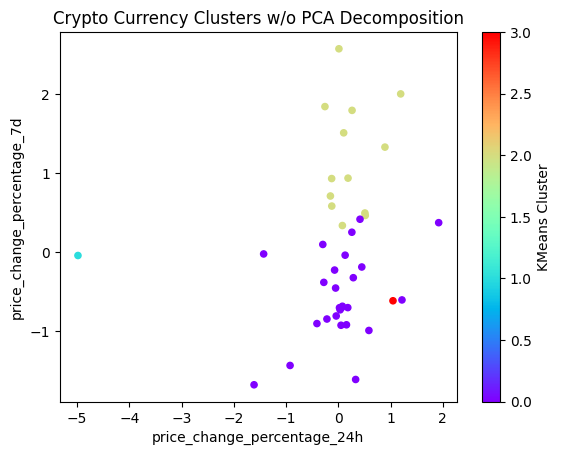

In [112]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
df_scaled_cryptos_predictions.plot.scatter(x='price_change_percentage_24h',
                                           y='price_change_percentage_7d',
                                           c='KMeans Cluster',
                                           title='Crypto Currency Clusters w/o PCA Decomposition',
                                           colormap='rainbow')

### Optimize Clusters with Principal Component Analysis.

In [113]:
# Create a PCA model instance and set `n_components=3`.
pca_model = PCA(n_components=3)

In [114]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
cryptos_pca = pca_model.fit_transform(df_scaled_cryptos)

# View the first five rows of the DataFrame. 
cryptos_pca[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [119]:
# Retrieve the explained variance to determine how much information can be attributed to each principal component.
explained_variance = pca_model.explained_variance_ratio_

# Print the explained variance for each principal component
for i in range(len(explained_variance)):
    print(f"{explained_variance[i]*100:.2f}% of the data variance can be explained with PC{i+1}.")

# Calculate the sum of the explained variances and print it
print(f"The total explained variance of the three principal components is {explained_variance.sum()*100:.2f}%.")

37.20% of the data variance can be explained with PC1.
34.70% of the data variance can be explained with PC2.
17.60% of the data variance can be explained with PC3.
The total explained variance of the three principal components is 89.50%.


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance of the three prinicipal components is `37.2% (PC1) + 34.7% (PC2) + 17.6% (PC3) = 89.5%`.

In [120]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
df_cryptos_pca = pd.DataFrame(cryptos_pca, columns=['PC1', 'PC2', 'PC3'])

# Copy the crypto names from the original data
df_cryptos_pca['coin_id'] = cryptos_market_data_df.index

# Set the 'coin_id' column as index
df_cryptos_pca.set_index('coin_id', inplace=True)

# Display sample data
df_cryptos_pca.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


### Find the Best Value for k Using the PCA Data

In [121]:
# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = calculate_elbow_method_data(df_cryptos_pca)

# Display the DataFrame
df_elbow_pca.head()

c:\Users\cguenther\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\cguenther\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\cguenther\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\cguenther\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarn

,k,inertia
0,1,256.874086
1,2,182.339530
2,3,135.442408
3,4,49.665497
4,5,38.672582


<Axes: xlabel='k'>

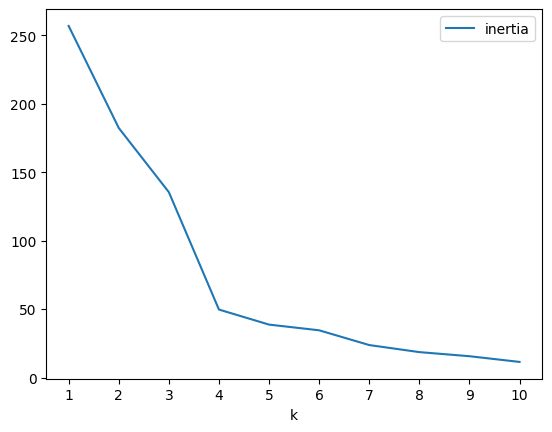

In [122]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow_pca.plot.line(x='k',
                       y='inertia',
                       xticks=df_elbow['k'])

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for `k` using PCA decomposition is `k=4`.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No, the `k` value obtained with PCA decomposition is identical to the original `k` value. 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [123]:
# Predict the clusters to group the cryptocurrencies using the crypto currencies PCA data
model_pca_k4_predictions = calculate_KMeans_clusters(df_cryptos_pca, 4)

# Print the resulting array of cluster values.
model_pca_k4_predictions

c:\Users\cguenther\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0])

In [125]:
# Create a copy of the DataFrame with the PCA data
df_cryptos_pca_predictions = df_cryptos_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_cryptos_pca_predictions['PCA Cluster'] = model_pca_k4_predictions

# Display sample data
df_cryptos_pca_predictions.head()

,PC1,PC2,PC3,PCA Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [126]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`.
df_cryptos_pca_predictions.hvplot.scatter(x='PC1',
                                          y='PC2',
                                          c='PCA Cluster',
                                          title='Crypto Currency Clustering with PCA Decomposition',
                                          colormap='rainbow')

:Scatter   [PC1]   (PC2,PCA Cluster)

### Determine the Weights of Each Feature on each Principal Component

In [127]:
# Use the columns from the original scaled DataFrame as the index.
cryptos_pca_component_weights = pd.DataFrame(pca_model.components_.T, columns=['PC1', 'PC2', 'PC3'], index=df_scaled_cryptos.columns)
cryptos_pca_component_weights

,PC1,PC2,PC3
price_change_percentage_24h,-0.416728,0.358162,-0.218795
price_change_percentage_7d,-0.102432,0.227432,0.787670
price_change_percentage_14d,-0.009162,0.540415,0.349534
price_change_percentage_30d,0.191523,0.562182,-0.181744
price_change_percentage_60d,0.320365,0.434040,-0.361377
price_change_percentage_200d,0.594468,0.027735,0.039733
price_change_percentage_1y],0.568379,-0.150789,0.210541


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** The following features have the strongest positive/negative influence on each component.
* PC1:
  * Strongest Positive: `price_change_percentage_200d`
  * Strongest Negative: `price_change_percentage_24h`
* PC2:
  * Strongest Positive: `price_change_percentage_30d`
  * Strongest Negative: `price_change_percentage_1y`
* PC3:
  * Strongest Positive: `price_change_percentage_7d`
  * Strongest Negative: `price_change_percentage_60d`
    